In [1]:
pwd


'D:\\Fold1\\Data Science Learning\\14-K-Nearest-Neighbors'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('KNN_Project_Data')

In [4]:
dataset.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


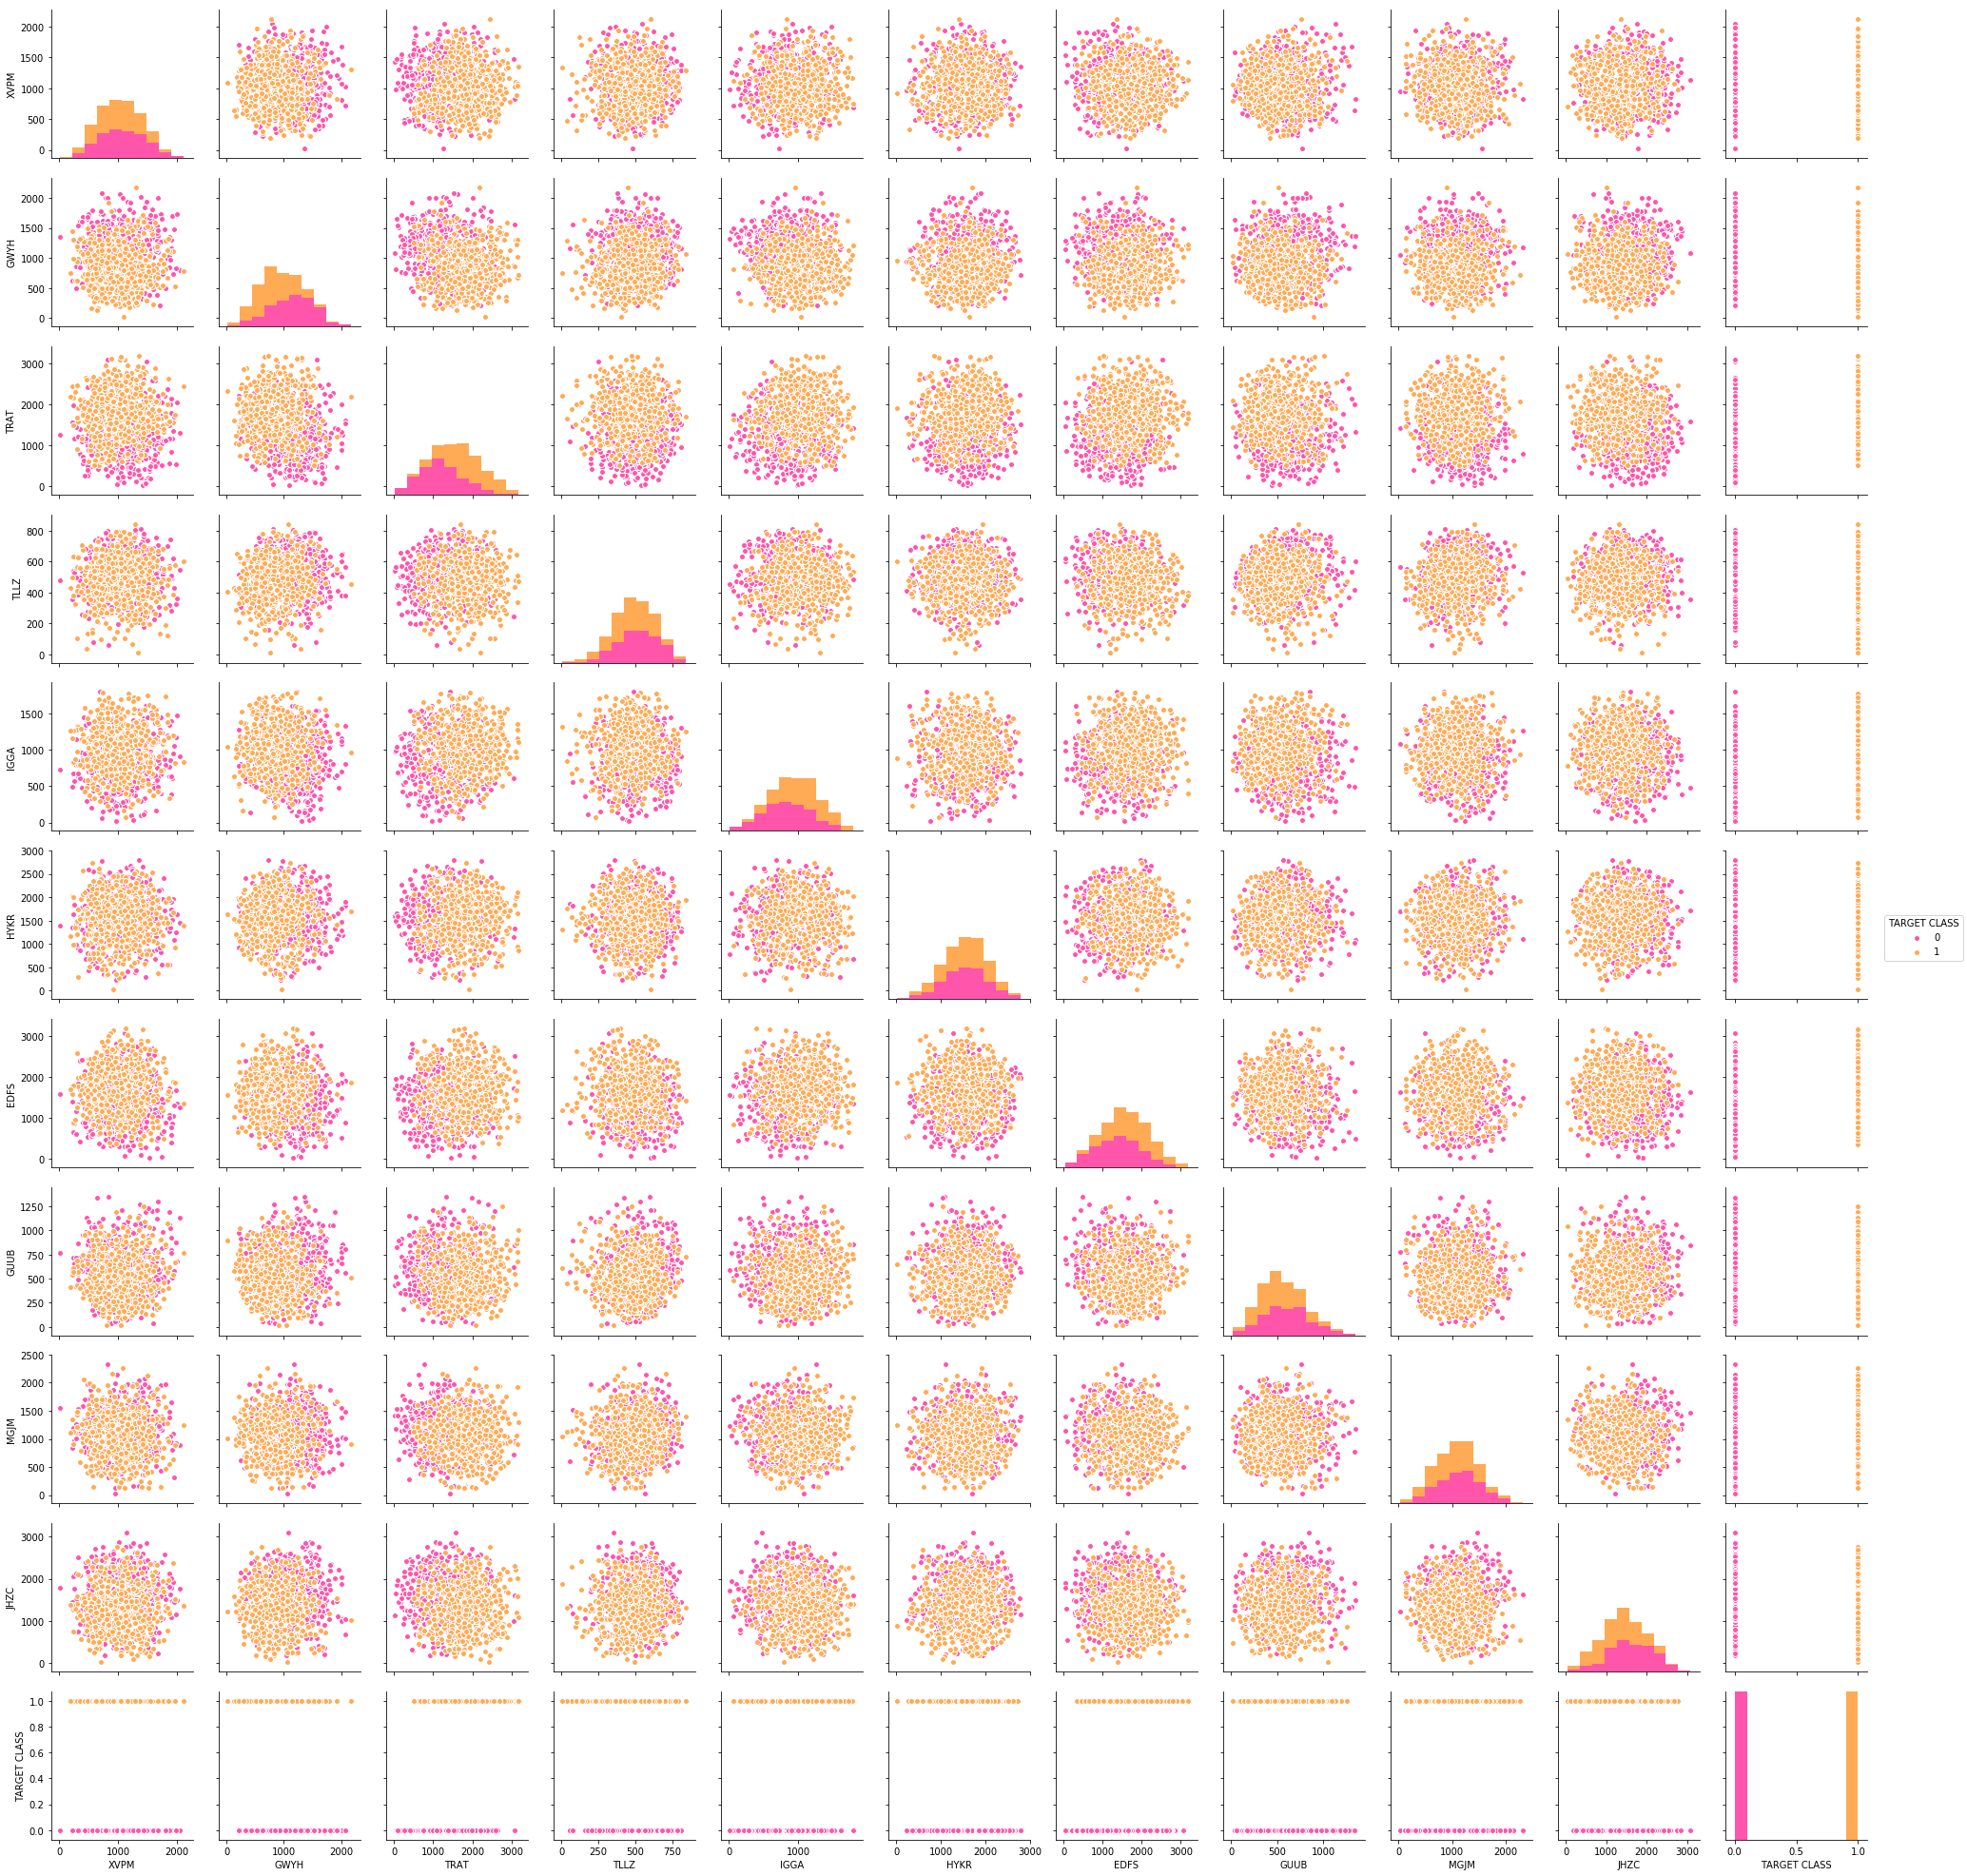

In [5]:
sns.pairplot(dataset,hue='TARGET CLASS',palette="spring")

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
stdscaler=StandardScaler()

In [30]:
X=dataset.drop('TARGET CLASS',axis=1)
X.head()


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


In [31]:
scaled_features=stdscaler.fit_transform(X)


In [34]:
scaled_features=pd.DataFrame(scaled_features,columns=X.columns)
scaled_features.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [37]:
y=dataset['TARGET CLASS']

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=15)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [67]:
predictions=knn.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
print(confusion_matrix(y_test,predictions))

[[136  27]
 [ 34 133]]


In [70]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.83      0.82       163
          1       0.83      0.80      0.81       167

avg / total       0.82      0.82      0.82       330



In [90]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0,0.5,'error rate')

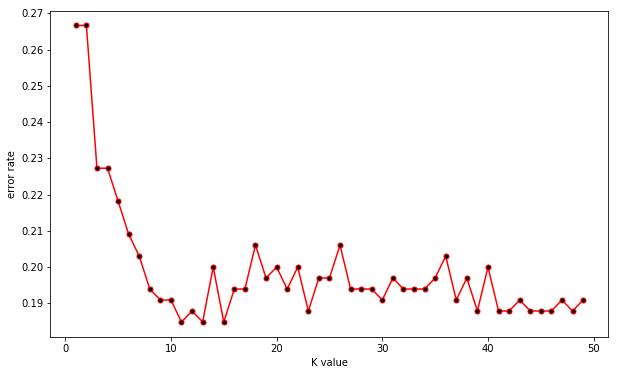

In [92]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='red',marker="o",markerfacecolor="black",markersize=5)
plt.xlabel("K value")
plt.ylabel("error rate")